# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_meta_study_results = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_meta_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
combined_mouse_meta_study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [3]:
# Checking the number of mice.
combined_mouse_meta_study_results["Mouse ID"].nunique()

249

In [4]:
#looking for duplicates based on ID & timepoint
duplicate_mice = combined_mouse_meta_study_results[combined_mouse_meta_study_results[['Mouse ID','Timepoint']].duplicated(keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = combined_mouse_meta_study_results.loc[(combined_mouse_meta_study_results["Mouse ID"]=="g989")]
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_mouse_meta_study_results = combined_mouse_meta_study_results.drop(combined_mouse_meta_study_results[combined_mouse_meta_study_results["Mouse ID"]=="g989"].index)
new_combined_mouse_meta_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
new_combined_mouse_meta_study_results["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
new_combined_mouse_meta_study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = new_combined_mouse_meta_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = new_combined_mouse_meta_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_var = new_combined_mouse_meta_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stdev = new_combined_mouse_meta_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sterr = new_combined_mouse_meta_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_table = pd.DataFrame({
    "Mean Tumor Volume": (mean_tumor_volume), 
    "Median Tumor Volume": (median_tumor_volume),
    "Tumor Volume Variance": (tumor_volume_var),
    "Tumor Volume Std. Dev.": (tumor_volume_stdev),
    "Tumor Volume Std. Err.": (tumor_volume_sterr)
})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_table_2 = new_combined_mouse_meta_study_results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
summary_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

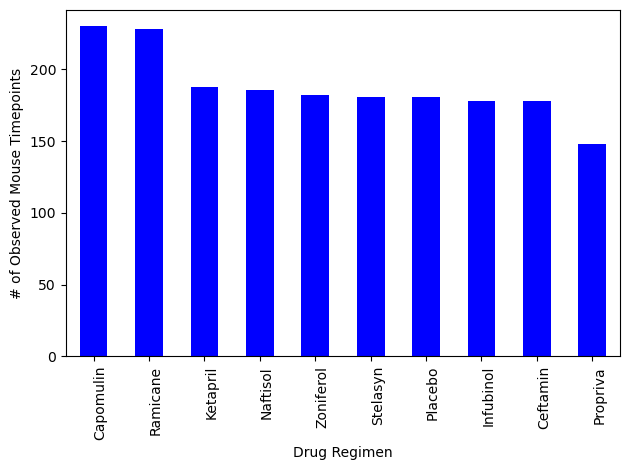

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drugs_pd = new_combined_mouse_meta_study_results["Drug Regimen"].value_counts()

xticklabels = drugs_pd.index

figure1 = drugs_pd.plot(kind="bar", facecolor="blue",
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right")
plt.tight_layout()
plt.show()


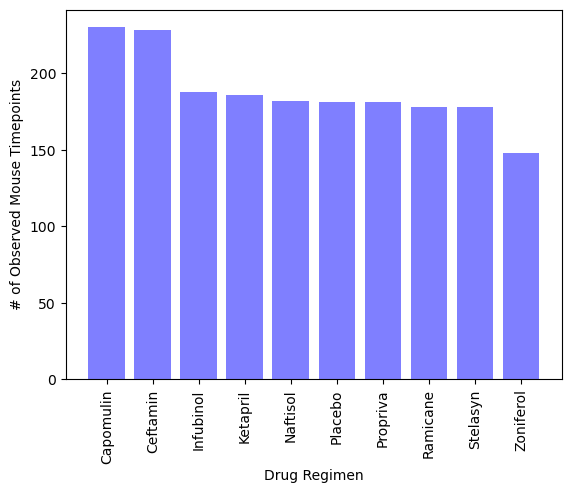

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import numpy as np
drugs = new_combined_mouse_meta_study_results["Drug Regimen"].value_counts()
x_axis = np.arange(len(drugs))

plt.bar(x_axis, drugs, color = 'blue',alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo",
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


In [15]:
#Create new Data Frame that drops all duplicate Mouse ID's so that we can total the Male & Female count easily
gender_df = new_combined_mouse_meta_study_results.drop_duplicates("Mouse ID")

gender_df.groupby('Sex')
gender_df = gender_df['Sex'].value_counts()

gender_df = pd.DataFrame(gender_df)

gender_df



,count
Sex,
Male,125
Female,123


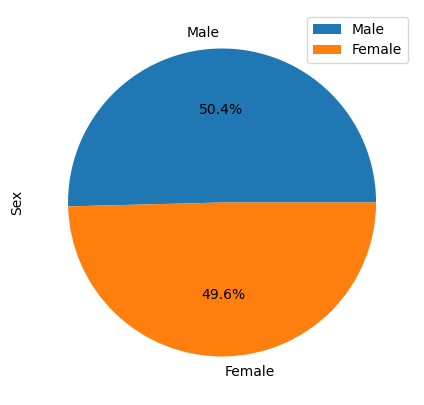

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df_pd = pd.DataFrame({'Sex': [gender_df.iloc[0,0],gender_df.iloc[1,0]],},index=["Male", "Female"])
plot = gender_df_pd.plot.pie(y='Sex', autopct = "%1.1f%%" , figsize=(5, 5))


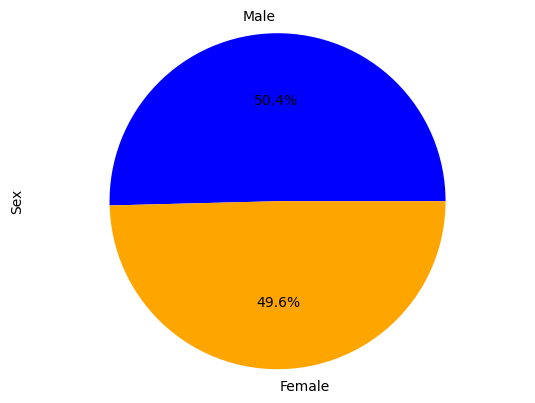

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_counts = [gender_df.iloc[0,0],gender_df.iloc[1,0]]
colors = ["blue","orange"]

plt.pie(gender_counts, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel("Sex")

# Create axes which are equal so we have a perfect circle

plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
df = combined_mouse_meta_study_results
df = df.set_index("Drug Regimen")

drugs_df = df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
drugs_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,b128,5,45.651331,0,Female,9,22
Capomulin,b128,10,43.270852,0,Female,9,22
Capomulin,b128,15,43.784893,0,Female,9,22
Capomulin,b128,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...
Ceftamin,q483,25,52.430066,1,Male,6,26
Ceftamin,q483,30,54.952226,1,Male,6,26
Ceftamin,q483,35,59.253484,1,Male,6,26


In [82]:
# # Start by getting the last (greatest) timepoint for each mouse
#Check to make sure the no. of max outputs
final_tumor_volume = drugs_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor_volume.unique()

array([45, 30,  0, 25,  5, 15, 20, 40, 35, 10])

In [84]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# # Combine the data into a single DataFrame
final_combined_mouse_meta_study_results = pd.merge(combined_mouse_meta_study_results,final_tumor_volume,how="inner",on=("Mouse ID","Timepoint"))
final_combined_mouse_meta_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


The lower quartile of temperatures is: 37.1877438025
The upper quartile of temperatures is: 59.930261755
The interquartile range of temperatures is: 22.742517952499995
The the median of temperatures is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


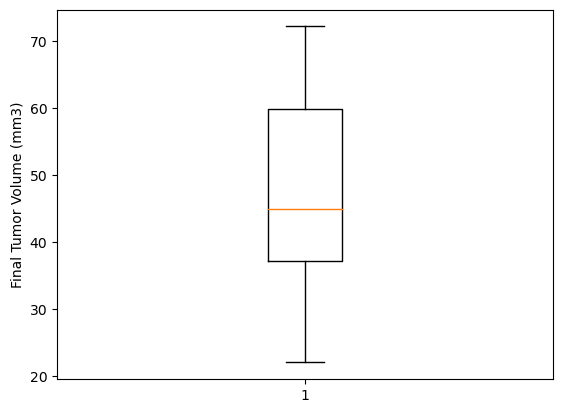

In [180]:
# # Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# # # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = final_combined_mouse_meta_study_results["Tumor Volume (mm3)"]

for x in treatments:


# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_combined_mouse_meta_study_results["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq   


    
#     # Locate the rows which contain mice on each drug and get the tumor volumes

    
#     # add subset 
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
    
#     # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# tumor_vol = final_combined_mouse_meta_study_results["Tumor Volume (mm3)"].append(tumor_vol)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()


In [188]:
Capomulin = final_combined_mouse_meta_study_results.loc[(final_combined_mouse_meta_study_results["Drug Regimen"]=="Capomulin")]
Ramicane = final_combined_mouse_meta_study_results.loc[(final_combined_mouse_meta_study_results["Drug Regimen"]=="Ramicane")]
Infubinol = final_combined_mouse_meta_study_results.loc[(final_combined_mouse_meta_study_results["Drug Regimen"]=="Infubinol")]
Ceftamin = final_combined_mouse_meta_study_results.loc[(final_combined_mouse_meta_study_results["Drug Regimen"]=="Ceftamin")]

In [199]:
    
tumor_vol_capomulin = Capomulin["Tumor Volume (mm3)"]
Capomulin_quartiles = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq   


Capomulin_lower_bound = Capomulin_lowerq - (1.5*iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*iqr)

tumor_vol_ramicane = Ramicane["Tumor Volume (mm3)"]    
Ramicane_quartiles = Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq   


Ramicane_lower_bound = Ramicane_lowerq - (1.5*iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*iqr)

    
tumor_vol_infubinol = Infubinol["Tumor Volume (mm3)"]    
Infubinol_quartiles = Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Ramicane_lowerq   


Infubinol_lower_bound = Infubinol_lowerq - (1.5*iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*iqr)

    
tumor_vol_ceftamin = Ceftamin["Tumor Volume (mm3)"]    
Ceftamin_quartiles = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ramicane_lowerq   


Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*iqr)






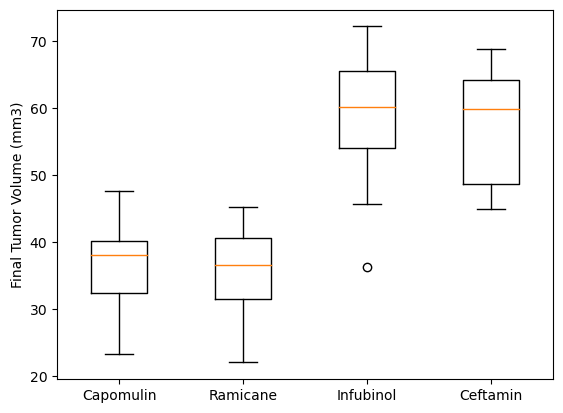

In [200]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
all_data = [tumor_vol_capomulin, tumor_vol_ramicane, tumor_vol_infubinol, tumor_vol_ceftamin]

plt.boxplot(all_data, vert=True, labels=treatments)

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [207]:
Capomulin_1 = new_combined_mouse_meta_study_results.loc[(new_combined_mouse_meta_study_results["Drug Regimen"]=="Capomulin")]
mouse_l509 = Capomulin_1.loc[(Capomulin_1["Mouse ID"]=="l509")]
mouse_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


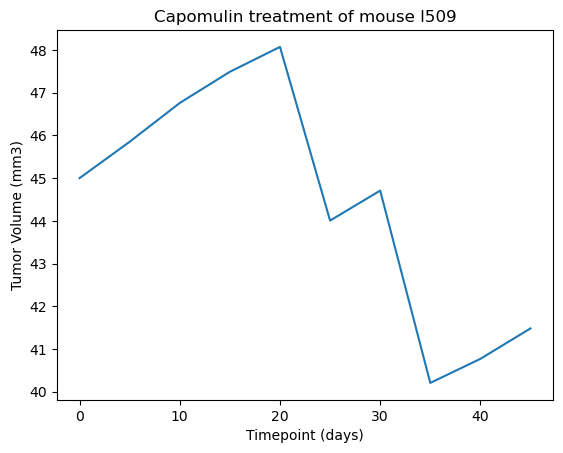

In [213]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis_data = mouse_l509["Timepoint"]
y_axis_data = mouse_l509["Tumor Volume (mm3)"]
plt.plot(x_axis_data, y_axis_data)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [236]:
Capomulin.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

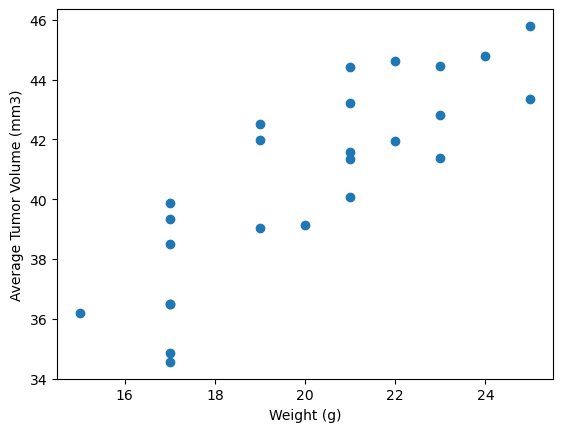

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_weight = Capomulin_1.groupby("Mouse ID" )["Weight (g)"].mean()
x_weight
y_axis_data = Capomulin_1.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y_axis_data


plt.scatter(x_weight, y_axis_data, marker = "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


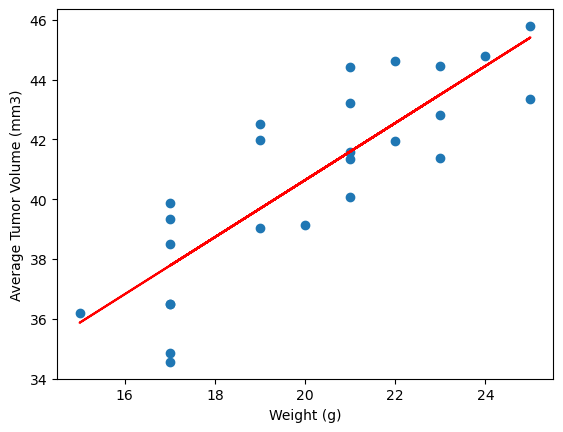

In [273]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_weight, y_axis_data)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

from scipy import stats

pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(x_weight, y_axis_data)
pe_fit = pe_slope * x_weight + pe_int
plt.plot(x_weight,pe_fit,"r-")
plt.scatter(x_weight, y_axis_data, marker = "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()